<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/PolynomialRegression_AI_Track_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Data Split

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polynomial Features Generation based on Degree

In [18]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly_train = poly_reg.fit_transform(X_train)

#Model Training

In [19]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction Based on training and testing data

In [6]:
y_pred_train=pol_reg.predict(X_poly_train)
X_poly_test = poly_reg.fit_transform(X_test)
y_pred_test=pol_reg.predict(X_poly_test)

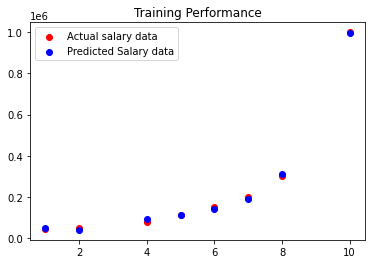

In [23]:
plt.scatter(X_train, y_train, color = 'red', label = 'Actual salary data')
plt.scatter(X_train, y_pred_train, color = 'blue', label = 'Predicted Salary data')
plt.title('Training Performance')
plt.legend(loc = 2)
plt.show()

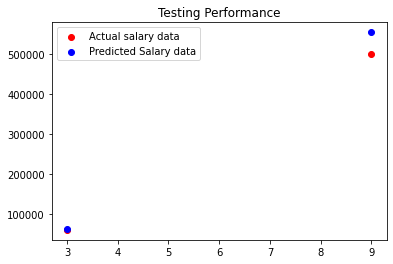

In [24]:
plt.scatter(X_test, y_test, color = 'red', label = 'Actual salary data')
plt.scatter(X_test, y_pred_test, color = 'blue', label = 'Predicted Salary data')
plt.title('Testing Performance')
plt.legend(loc = 2)
plt.show()

# Error Metrics calculation

In [7]:

import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 8242.136131647141
Mean square error 67932808.01260331
Mean absolute error 7526.745868225344


In [8]:
#Testing Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 38573.73363828045
Mean square error 1487932926.7970088
Mean absolute error 28553.553338501006


#Save Model

In [15]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(pol_reg, open(filename, 'wb'))

#Deployment

In [14]:
user_ip=input('enter employ level')
level=np.array(float(user_ip))
level=level.reshape(-1,1)
level_features = poly_reg.fit_transform(level)
salary=pol_reg.predict(level_features)
print('salary of employ',salary)

enter employ level2
salary of employ [39737.47908]


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
model = pickle.load(open('model.pkl', 'rb'))

user_ip=input('enter employ level')
level=np.array(float(user_ip))
level=level.reshape(-1,1)
level_features = poly_reg.fit_transform(level)
salary=model.predict(level_features)
print('salary of employ',salary)

enter employ level5
salary of employ [114333.04512594]


## Thank You